<a href="https://colab.research.google.com/github/DebarajPurohit/car-price-prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### <b>Problem Statement</b>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### <b> Business Goal</b>
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 4: MACHINE LEARNING/projects/Car Price Prediction/CarPrice_project.csv')

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.shape

(205, 26)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### <b>DataSet Information:</b>

Car_ID: Unique id of each observation (Interger)

Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)

CarName: Name of car company (Categorical)

fueltype: Car fuel type i.e gas or diesel (Categorical)

aspiration: Aspiration used in a car (Categorical)

doornumber: Number of doors in a car (Categorical)

carbody: body of car (Categorical)

drivewheel: type of drive wheel (Categorical)

enginelocation: Location of car engine (Categorical)

wheelbase: Weelbase of car (Numeric)

carlength: Length of car (Numeric)

carwidth: Width of car (Numeric)

carheight: height of car (Numeric)

curbweight: The weight of a car without occupants or baggage. (Numeric)

enginetype: Type of engine. (Categorical)

cylindernumber: cylinder placed in the car (Categorical)

enginesize: Size of car (Numeric)

fuelsystem: Fuel system of car (Categorical)

boreratio: Boreratio of car (Numeric)

stroke: Stroke or volume inside the engine (Numeric)

compressionratio: compression ratio of car (Numeric)

horsepower: Horsepower (Numeric)

peakrpm: car peak rpm (Numeric)

citympg: Mileage in city (Numeric)

highwaympg: Mileage on highway (Numeric)

price(Dependent variable): Price of car (Numeric)

In [6]:
# Overviewing the distribution of data 
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
dataset.describe().columns
len(dataset.describe().columns)

16

In [8]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [9]:
# Check duplicate values
len(dataset[dataset.duplicated()])

0

In [10]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Exploratory Data Analysis

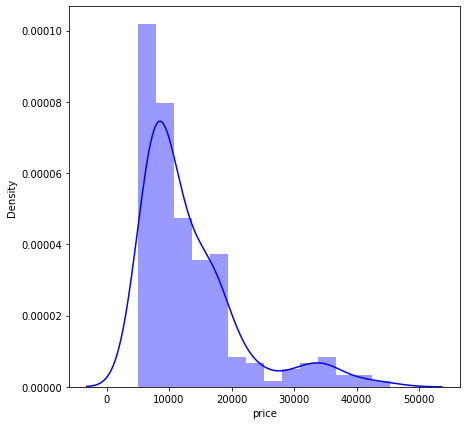

In [11]:
# Dependent variable 'Price' distribution
plt.figure(figsize=(7,7))
sns.distplot(dataset['price'],color="b")

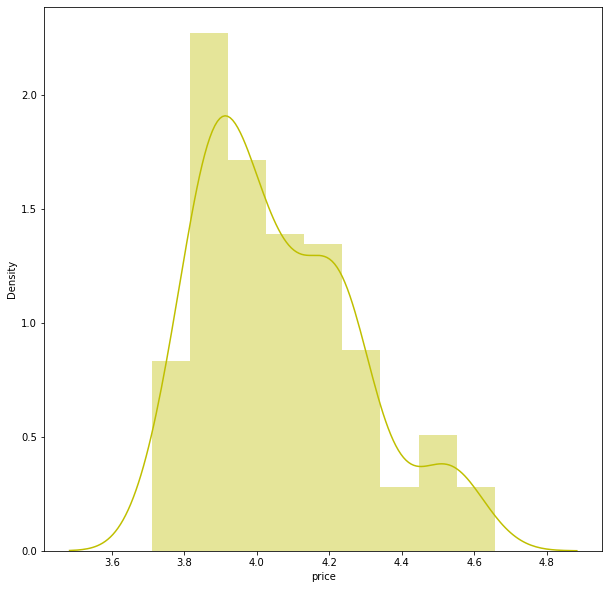

In [12]:
#Log transformation for right skewed distribution
plt.figure(figsize=(10,10))
sns.distplot(np.log10(dataset['price']),color='y')

In [13]:
numeric_features = dataset.describe().columns
numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

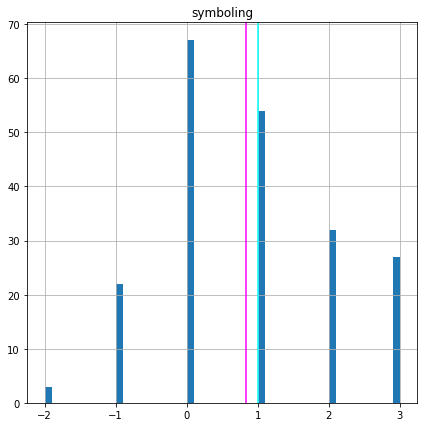

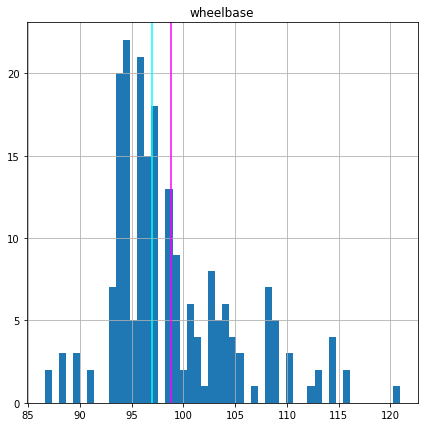

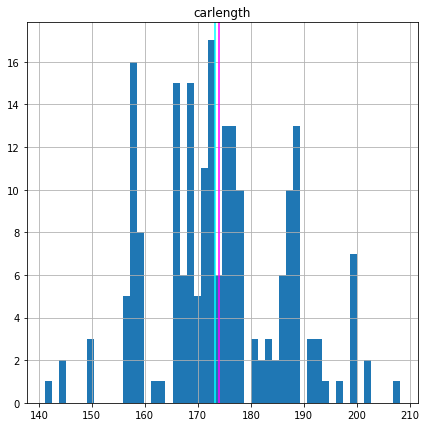

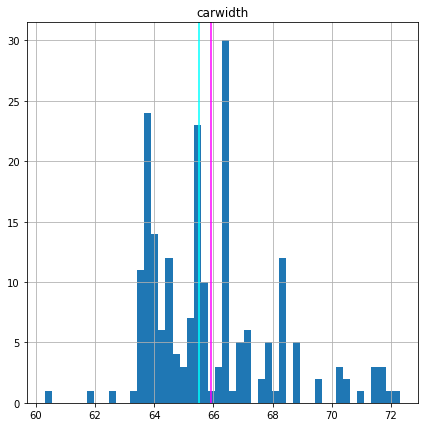

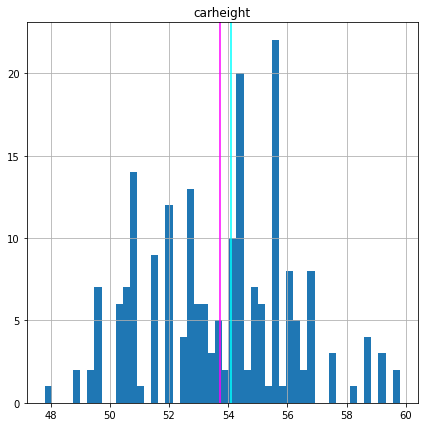

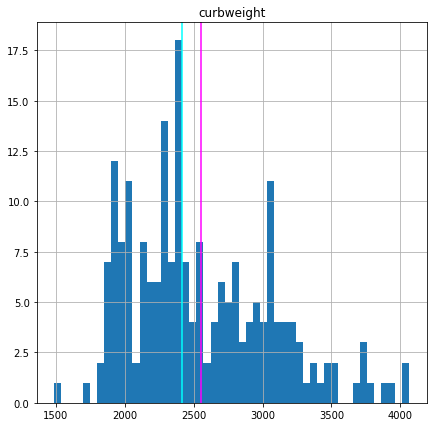

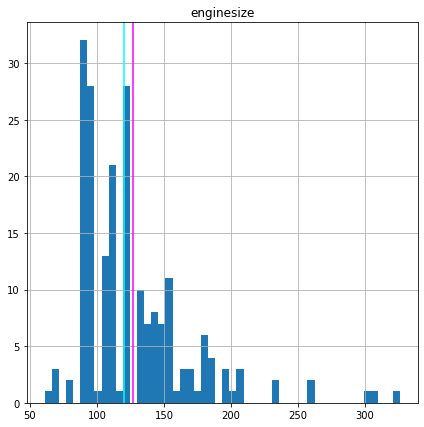

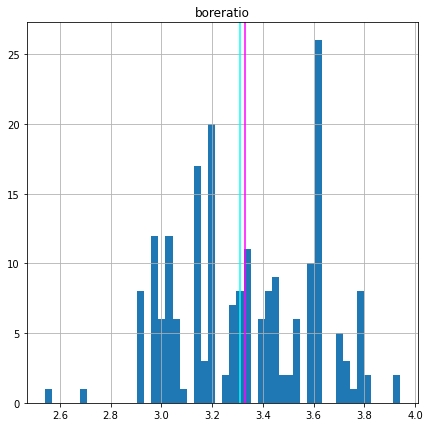

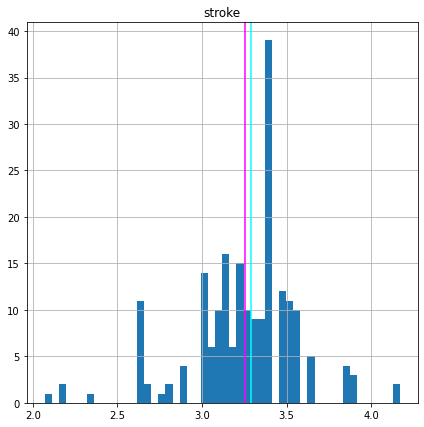

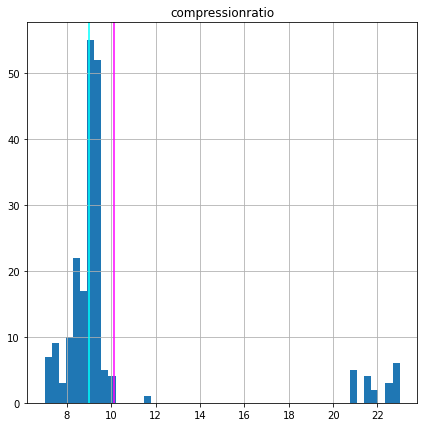

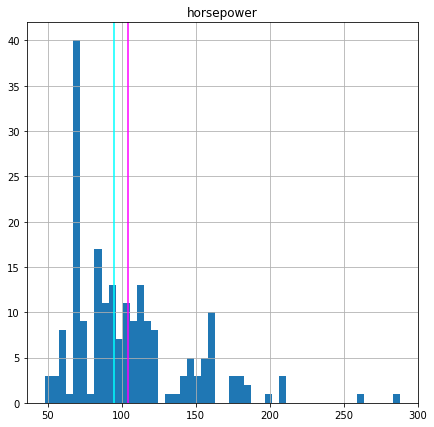

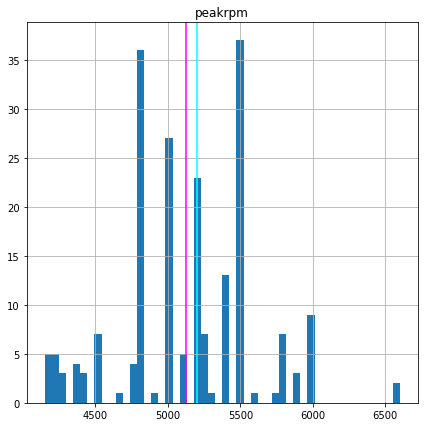

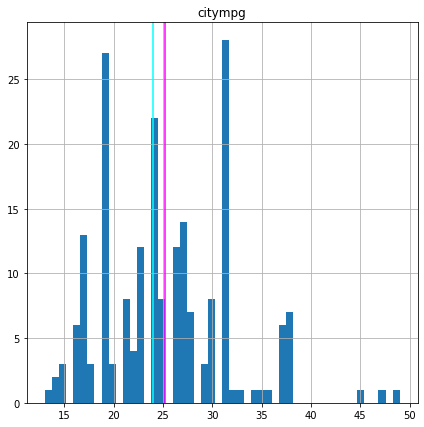

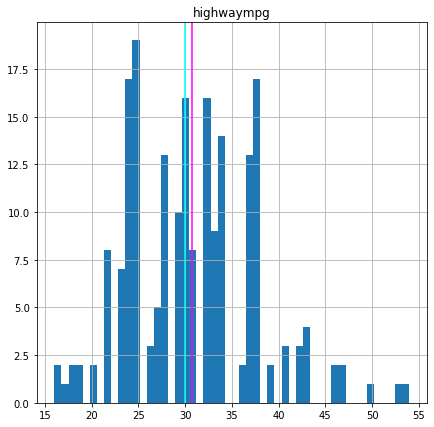

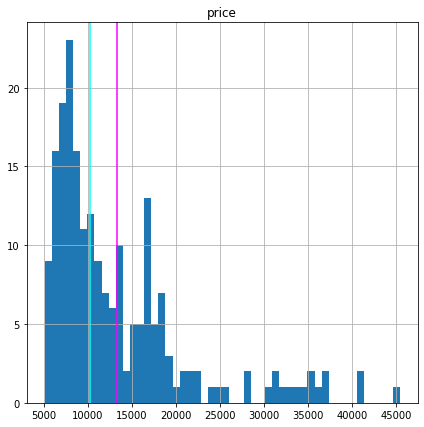

In [14]:
#plot a bar plot for each numerical feature count
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(7,7))
  ax= fig.gca()
  feature = dataset[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(), color='magenta')
  ax.axvline(feature.median(), color= 'cyan')
  ax.set_title(col)
plt.show()

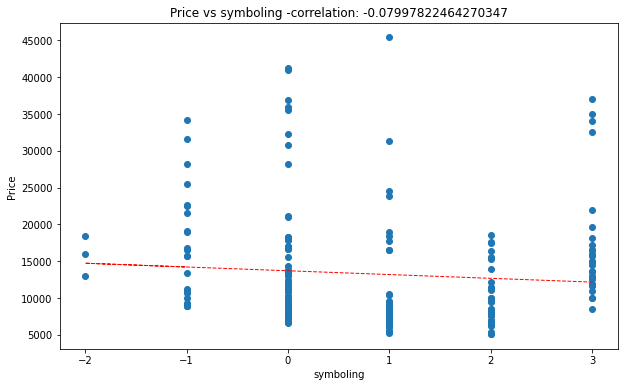

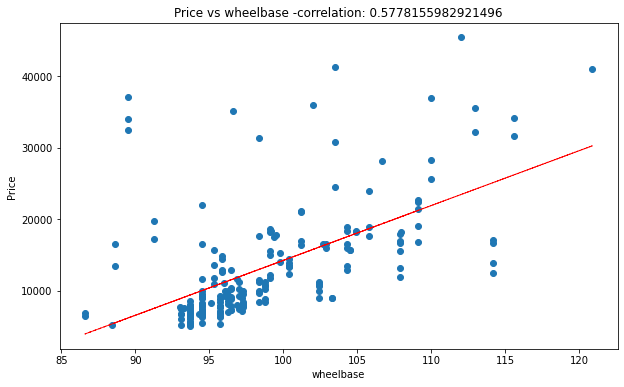

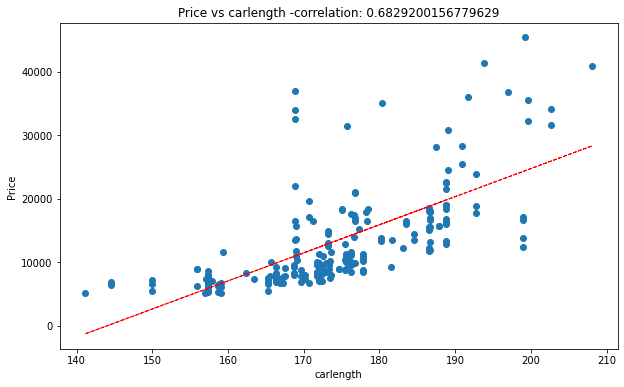

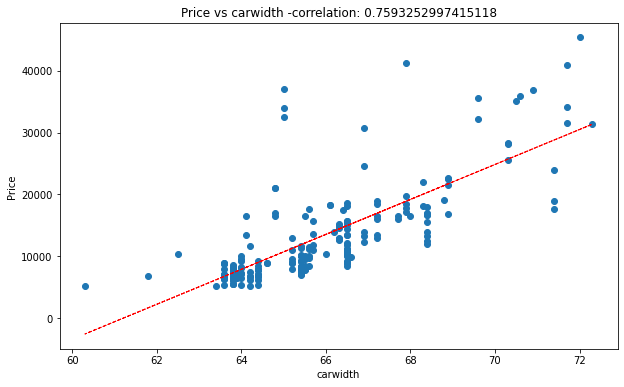

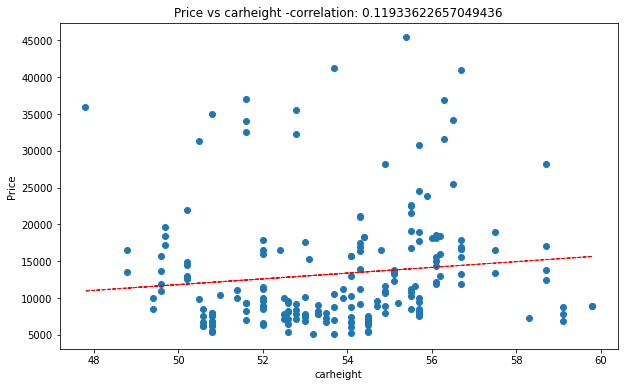

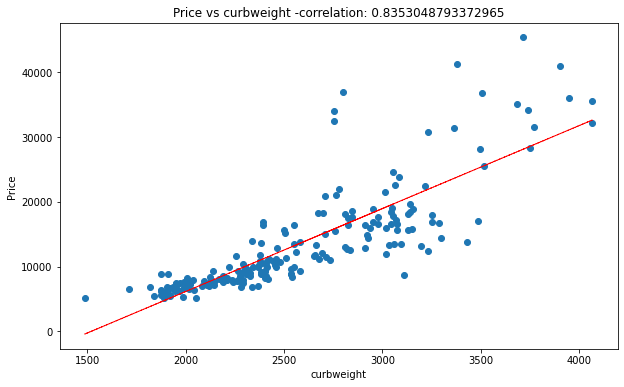

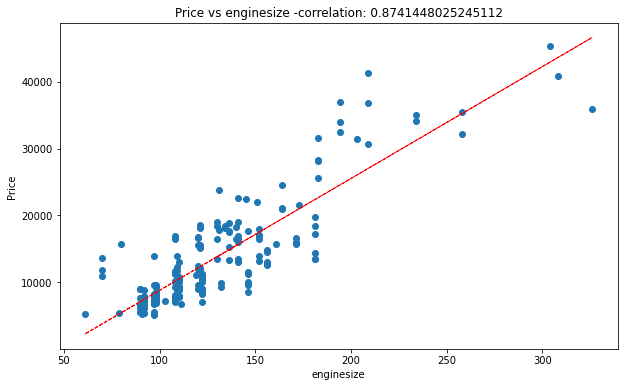

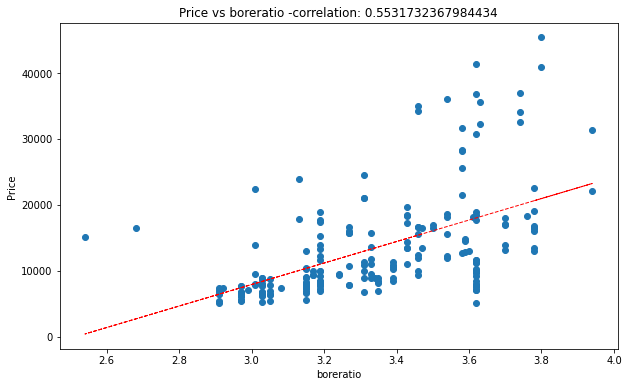

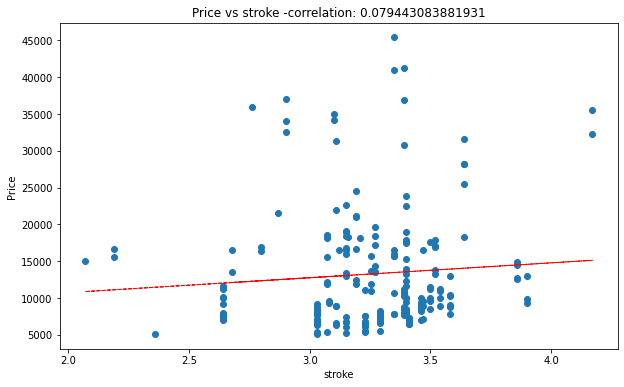

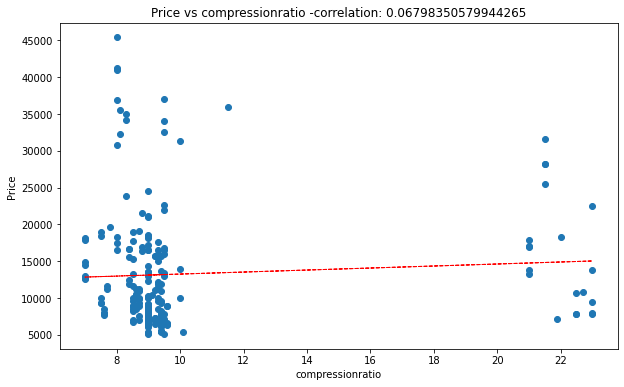

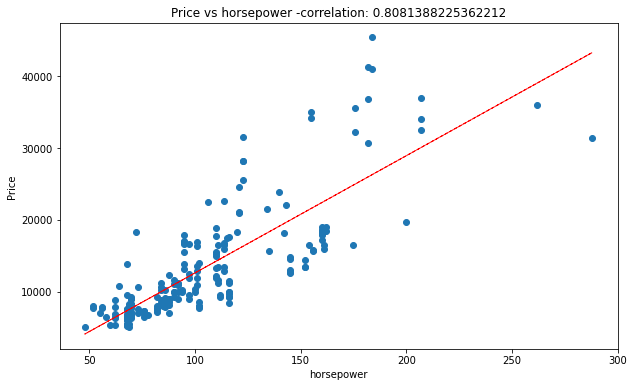

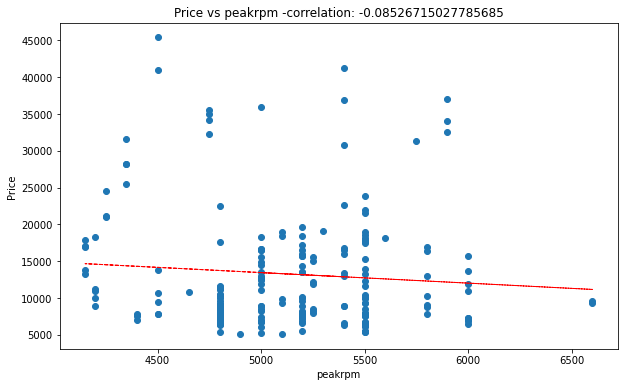

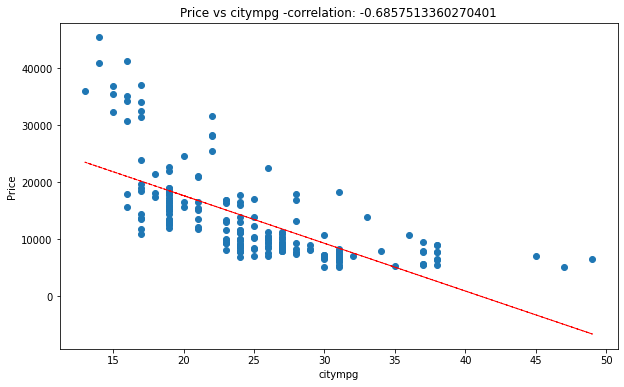

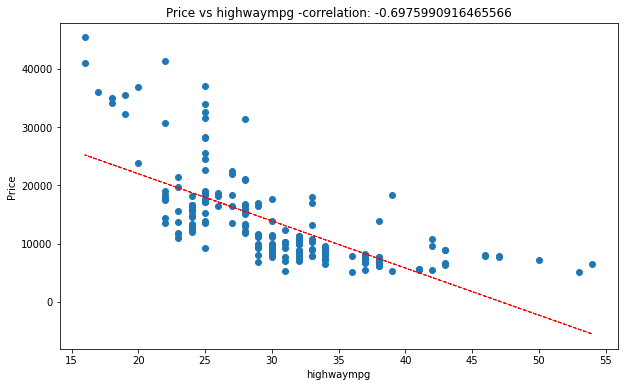

In [27]:
for col in numeric_features[1:-1]:
  # define figure objects
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  # assigning the feature and label variables
  feature = dataset[col]
  label = dataset['price']
  #Getting the correlation
  correlation = feature.corr(label)
  #Plotting the Scatter plot
  plt.scatter(x=feature, y= label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Price vs '+col+' -correlation: '+str(correlation))
  # getting the regression line
  z= np.polyfit(dataset[col], dataset['price'],1)
  y_hat=np.poly1d(z)(dataset[col])

  plt.plot(dataset[col], y_hat, 'r--', lw = 1)
plt.show()
